<a href="https://colab.research.google.com/github/travis3630/Foundation-in-ML/blob/main/ML_lab2_Softmax_Regression_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import jax.numpy as jnp
from jax import grad, vmap, random

In [2]:
# %env JAX_PLATFORM_NAME=cpu
# If we uncomment the magic env line above, you won't 
# see the error of not finding a GPU/TPU  when you first call JAX (below)

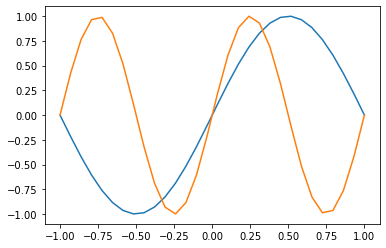

In [3]:
Xn=np.linspace(-1,1,30)
y1=np.sin(Xn*(np.pi))
y2=np.sin(Xn*(2*np.pi))
plt.plot(Xn,y1)
plt.plot(Xn,y2)

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


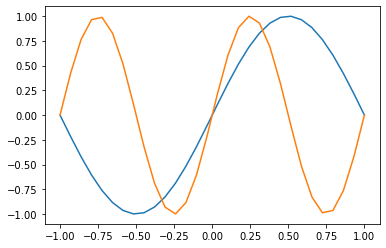

In [4]:
def wsin(w, xin):
    return jnp.array(jnp.sin(w*xin))
Xj=jnp.linspace(-1,1,30)

plt.plot(Xj, wsin(1., np.pi*Xj))
plt.plot(Xj, wsin(2., np.pi*Xj))

In [5]:
print(type(Xn), '\n', type(Xj))

<class 'numpy.ndarray'> 
 <class 'jax.interpreters.xla.DeviceArray'>


In [6]:
d_wsin_x = grad(wsin, argnums=1)
d_wsin_w = grad(wsin, argnums=0)

In [7]:
print(wsin(1.,0.), d_wsin_x(1., 0.), d_wsin_w(1.,0.))
print(wsin(3.,0.), d_wsin_x(3., 0.), d_wsin_w(3.,0.))

0.0 1.0 0.0
0.0 3.0 0.0


In [8]:
# As before calling wsin on an array returns an array
xvals = jnp.linspace(-1,1,5)
print(xvals,'\n',wsin(1.,np.pi*xvals))

[-1.  -0.5  0.   0.5  1. ] 
 [ 8.742278e-08 -1.000000e+00  0.000000e+00  1.000000e+00 -8.742278e-08]


In [9]:
# uncomment this 
# d_wsin_w(1.,xvals)

In [10]:
grad_wsin_w = vmap(d_wsin_w, in_axes=(None, 0))
grad_wsin_x = vmap(d_wsin_x, in_axes=(None, 0))
print(grad_wsin_w(1., np.pi*xvals))
print(grad_wsin_x(1., np.pi*xvals))

[ 3.1415927e+00  6.8661691e-08  0.0000000e+00 -6.8661691e-08
 -3.1415927e+00]
[-1.000000e+00 -4.371139e-08  1.000000e+00 -4.371139e-08 -1.000000e+00]


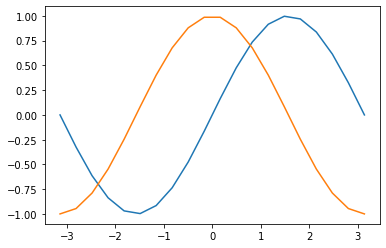

In [11]:
# Having done this, you can now evaluate the gradient on an array 
# and plot the returned array of values
X_plot = np.linspace(-1,1,20)
plt.plot(np.pi*X_plot, wsin(1., np.pi*X_plot))
plt.plot(np.pi*X_plot, grad_wsin_x(1., np.pi*X_plot))

Note:
We never called the cosine function. Calling the grad operation on sin enabled the automatic differentiation (AD) routines within JAX to compute (d/dx) sin (x) = cos (x).

Your turn:
Plot (d/dx) sin(w x) for different values of w.
Plot (d/dw) sin(w x) for different values of w.

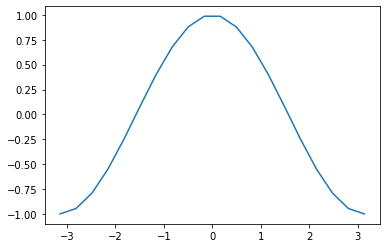

In [12]:
############################ TRY #####################################
#plt.plot(np.pi*X_plot, grad_wsin_x(1., np.pi*X_plot))
#plt.plot(np.pi*X_plot, grad_wsin_x(2., np.pi*X_plot))
W_plot = np.linspace(-1,1,20)
grad_wsin_w = vmap(d_wsin_w, in_axes=(0, None))
plt.plot(np.pi*X_plot, grad_wsin_w(np.pi*W_plot, 1))

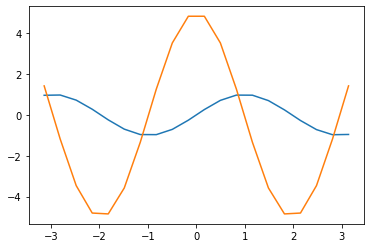

In [13]:
grad_wsin_w = vmap(d_wsin_w, in_axes=(0, None))
X_plot = np.linspace(-1,1,20)
plt.plot(np.pi*X_plot, wsin(X_plot, 5.))
plt.plot(np.pi*X_plot, grad_wsin_w(X_plot, 5.))

In [14]:
def sigmoid(w, xin):
    return jnp.array(1/(1+jnp.exp(-w*xin)))

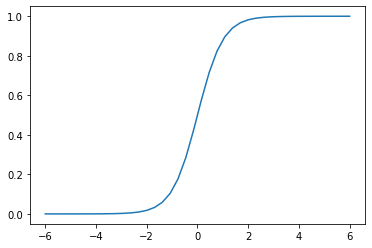

In [15]:
X1 = np.linspace(-6,6,40)
plt.plot(X1, sigmoid(2.,X1))

In [16]:
######### your code goes here #########
d_sigmoidw = grad(sigmoid, argnums=0)
d_sigmoidx = grad(sigmoid, argnums=1)
grad_sigmoid_w = vmap(d_sigmoidw, in_axes=(0, None))
grad_sigmoid_x = vmap(d_sigmoidx, in_axes=(None, 0))

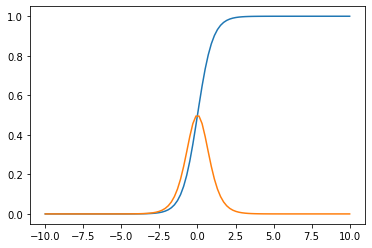

In [17]:
########try code##############
#derive w
X_axis = np.linspace(-10,10,100)
plt.plot(X_axis, sigmoid(2., X_axis))
plt.plot(X_axis, grad_sigmoid_x(2.,X_axis))

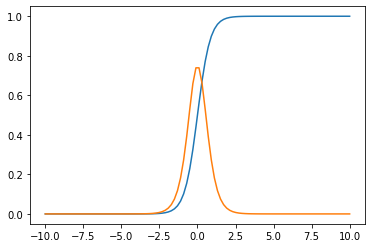

In [20]:
W_val = np.linspace(-8,8,100)
plt.plot(X_axis, sigmoid(W_val, 3.))
plt.plot(X_axis, grad_sigmoid_w(W_val, 3.))